# <font color = 'Dark Green'> 1. Basic Libraries to be load 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# <font color ='Dark green'> 2. Basic Checking 

In [3]:
df = pd.read_excel('Employee_Data.xls')

---------------------------------------------------------------------------------------------------------------------------
### a. Glimpse at data
1.df.head() ----------------- check first five rows <br>
2. df.tail() -----------------check last five rows <br>
3. df.shape() ----------------Rows X columns <br>
4. df.describe() -------------Basic Statistics <br>
5. df.info() -----------------For checking non null values and datatypes of each variable  <br>
6. df.columns-----------------Name of the columns

--------------------------------------------------------------------------------------------------------------------------
### b.Check for Duplicates 
1. duplicates = df.duplicated() <br>
2. print( " No of duplicated rows = %d " %(dupicates.sum())) <br>
3. df.drop_duplicates(inplace =True)

--------------------------------------------------------------------------------------------------------------------------
### c. Convert datatype into required datatype.
     df['POSTAL CODE']=pd.Categorical(df['POSTAL CODE'])

# <u><font color = 'Dark Green' > 3.Preprocessing </font>

## <font color ='Orange'> a. Handling Missing value 

 Checking threshold value for missing value i.e 25% 
1. <b> df.isnull().sum()/len(df) * 100 </b> ------------ Will give each column missing value percentage <br>


### <u> Imputation is required for missing values 

1. If variable is <font color ='blue'>Categorical </font> ,imputation is done based on MODE 
2. If variable is <font color ='blue'>Numerical </font> ,imputation is done based on Mean or Median
2.a.  If the variable does not contain Outliers <font color ='red'>Mean</font> is recommended 
2.b.  If the variable does contain Outlier <font color = 'red'>Median </font>is recommended 

###### For Mode calculations
1.  df [<font color = 'Green'> ' Categorical_value_variable '</font>].value_counts() <br>
2.  <font color ='Blue'> mode_df_categorical </font> = df [<font color = 'Green'> ' Categorical_value_variable '</font>].mode().value[0]
3.  df [<font color = 'Green'> ' Categorical_value_variable '</font>].replace(np.nan,<font color = 'Blue' > mode_df_categorical </font>,inplace = True)

###### For Numerical values---Median
1. <font color = 'Blue'> median </font> = df [ <font color = 'Green'>'Numerical_variable'</font> ].<font color = 'Blue'> median() </font>
2.  df [<font color ='Green'>'Numerical_variable'</font> ].replace(np.nan,<font color = 'Blue'> median </font> , inplace = True)

###### For Numerical values--- Mean
1. <font color = 'Blue'> mean </font> = df [ <font color = 'Green'>'Numerical_variable'</font> ].<font color = 'Blue'> mean() </font>
2.  df [<font color ='Green'>'Numerical_variable'</font> ].replace(np.nan,<font color = 'Blue'> mean </font> , inplace = True)

### <u> <i> Imputation based on Sk-learn package 

<b> -> </b> input should be in the form of array <br>
<b> -> </b> For that we will convert dataframe to np.array <br> 
<b> -> </b> select only those columns in which <b><font color = 'red' > null </font></b> values are present. <br>
    eg. x=mydata.iloc[<b>:,4:</b>].<b> <font color = 'red'> values </font></b> 


In [11]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
x = SimpleImputer.fit_transform(x)
x =pd.DataFrame(x)
x.columns = ['Age','Experiance','Salary']

## <font color='Orange'> b. Handling Outliers ##

In [14]:
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


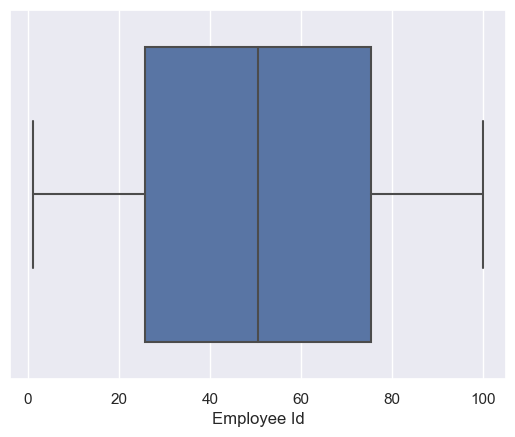

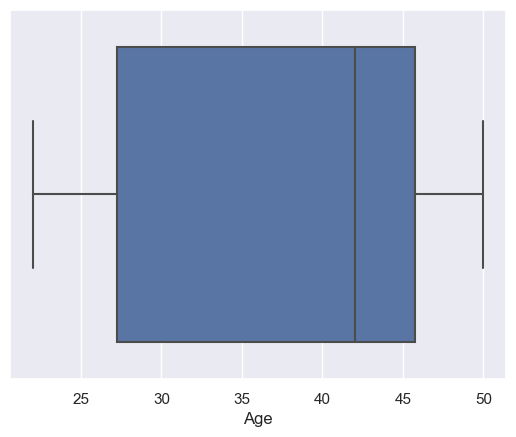

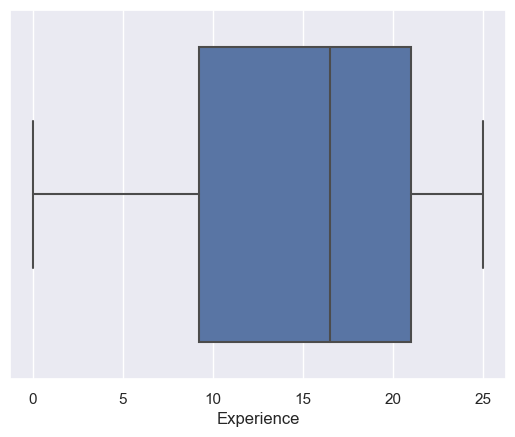

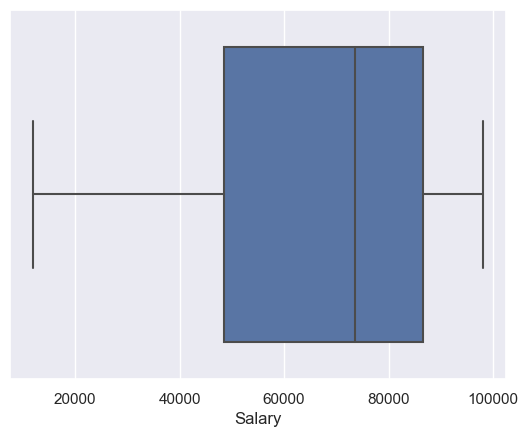

In [17]:
## First we can check if certain variable contains outliers or not using Boxplot chart

def box_plot(col):
    sns.boxplot(x=df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude='object')):
    box_plot(i)

In [27]:
## If outlier are present we can handle by user_defined functions
## points to remember 
## 1. its col.quantile not df.quantile
## 2. its quantile([0.25,0.75]) not qunatile(0.25,0.75)

def outlier_removal(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    upper_range = Q3 + 1.5*IQR
    lower_range = Q1 - 1.5*IQR
    return upper_range, lower_range

In [28]:
    upper_age,lower_age = outlier_removal(df['Age'])
    df['Age'] = np.where(df['Age']>upper_age,upper_age,df['Age'])
    df['Age'] = np.where(df['Age']<lower_age,lower_age,df['Age'])

In [ ]:
## recheck for outlier presence by calling same function\

for i in list(df.select_dtypes(exclude=['object'])):
    box_plot(i)

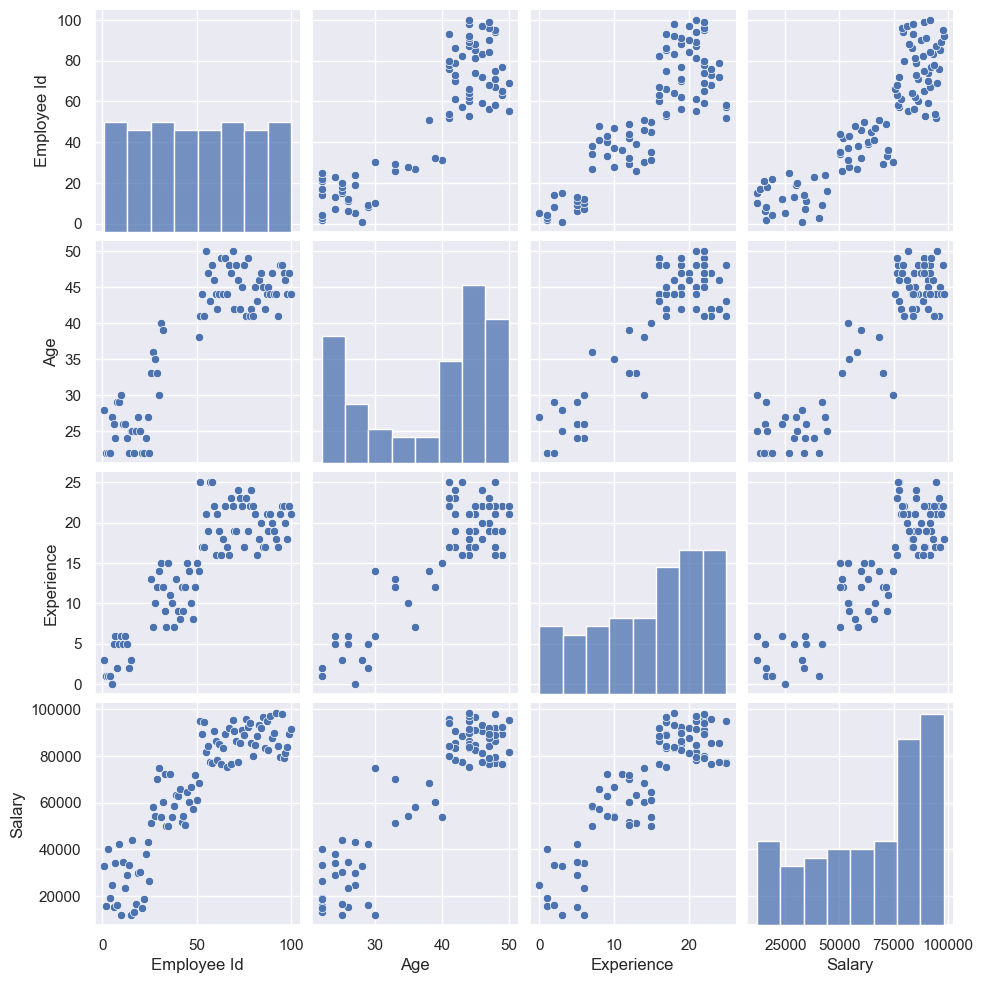

In [31]:
## Random Check ------ Just casual 
sns.pairplot(df)

## <font color = 'Orange'> C.Encoding 

<b> -> </b> Two types of Encoding  <br>
<b> -> </b> One-hot encoding <br>
<b> -> </b> Label Encoding  <br>
--------------------------------------------------------------------------------------------------------------------------
<b> -></b> Convert categorical variable into Numerical variable for further analysis. <br>
<b> -></b> One hot encoder for more than 2 catergorical varibale <br>
<b> -></b> Label encoder only for 1 or 2 categorical variable <br>
<b> -></b> After encoding one column must be dropped to avoid dummy variable trap.<br>

### <u> <b> One Hot Encoding 

dummies = pd.get_dummies(df,columns=['Age','Department',etc..],drop_first=True)

modified_df = df_without_categorical_variables

pd.concat([modified_df,dummies],axis=1)